### Analysis of factors that affect student's quality of academic performance

1- Age
2- Gender
3 - Geographical belongingness
4 - Ethnicity
5 - Marital status
6 - socioeconomic status (SES)
7 - parents’ education level
8 - parental profession
9 - language
10 - income
11 - religious affiliations


# Importação das bibliotecas

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import dask.dataframe as dd
from utils import load_parquets, info_sum_isna
from scipy.stats import ranksums
from scipy import stats

# Carregando os dados

### Dataset information:



In [69]:
year = 2020
path = f'../datasets/integrated_datas_{year}.parquet.gzip'
data = dd.read_parquet(path, ignore_metadata_file=True)

In [70]:
# data = dd.read_parquet('../datasets/integrated_datas.parquet.gzip', ignore_metadata_file=True)

In [71]:
data.tail()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_SES_INCOME,TP_SES_POINTS
31186,2020,Sousa,PB,2,M,2,0,2,1,3,...,A,B,A,A,D,A,B,B,E,DE
31187,2020,Cruzeiro do Sul,AC,7,F,1,2,1,1,2,...,A,B,A,A,D,A,A,A,E,DE
31188,2020,Ananindeua,PA,2,F,2,0,2,1,3,...,A,B,A,A,D,A,A,A,E,DE
31189,2020,Crateús,CE,2,F,2,0,2,1,1,...,A,B,A,A,D,A,B,B,E,C1
31190,2020,São Luís,MA,2,F,2,0,2,1,3,...,A,B,B,A,D,A,A,B,E,DE


In [72]:
len(data)

2561304

## Testes estatisticos para 2 variavies (Genero)

In [73]:
data_pie = data['TP_SEXO'].value_counts().compute().sort_index()

In [74]:
from turtle import color


def graficoSexo(data):
    #define data
    data_pie = data['TP_SEXO'].value_counts().compute().sort_index()
    labels = ['F', 'M']

    #define Seaborn color palette to use
    colors = ['#fd7f6f', '#7eb0d5']

    #create pie chart
    plt.pie(data_pie, labels = labels, colors = colors, autopct='%.0f%%')
    plt.legend()
    plt.title("Male x Female students in 2020", color="white")
    plt.show()

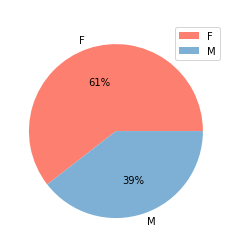

In [75]:
graficoSexo(data)

In [76]:
# mulher_fixed = mulher.reset_index()

We can test the hypothesis that two independent unequal-sized samples are drawn from the same distribution with computing the Wilcoxon rank-sum statistic.

The p-value of less than 0.05 indicates that this test rejects the hypothesis at the 5% significance level.

### Analisando a distribuicao (Homens x Mulheres) para nivel Brasil

In [77]:
mulher_2020 = data[(data['TP_SEXO'] == 'F')]
homem_2020 = data[(data['TP_SEXO'] == 'M')]

In [78]:
mulher_2020.head()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_SES_INCOME,TP_SES_POINTS
0,2020,Cerro Largo,RS,3,F,1,1,1,1,3,...,A,B,B,A,D,A,B,B,E,DE
1,2020,João Pessoa,PB,5,F,1,3,1,2,3,...,A,B,A,A,C,A,A,A,E,DE
3,2020,Maceió,AL,7,F,1,3,1,1,3,...,A,B,B,A,C,A,B,B,E,DE
5,2020,Cristalândia,TO,6,F,1,3,1,1,3,...,A,B,A,A,C,A,B,A,E,DE
6,2020,Bragança Paulista,SP,5,F,1,2,1,2,2,...,A,A,A,A,C,A,A,B,E,DE


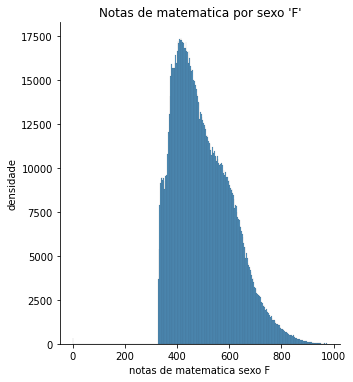

In [79]:
ax = sns.displot(mulher_2020.NU_NOTA_MT).set(title="Notas de matematica por sexo 'F'")
ax.set(xlabel="notas de matematica sexo F", ylabel="densidade")

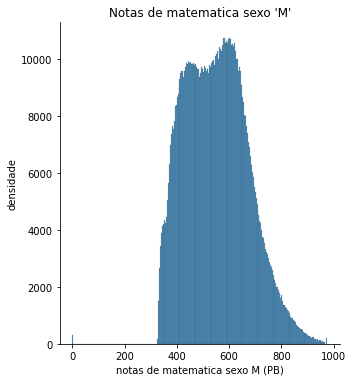

In [80]:
ax = sns.displot(homem_2020.NU_NOTA_MT).set(title="Notas de matematica sexo 'M'")
ax.set(xlabel="notas de matematica sexo M (PB)", ylabel="densidade")

Text(0.5, 1.0, 'Distribuicao das notas no Brasil por sexo em 2020')

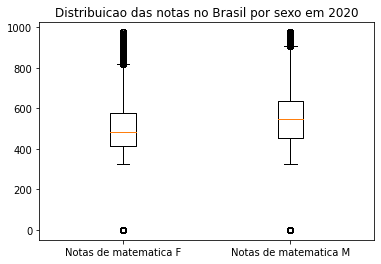

In [81]:
plt.boxplot([mulher_2020.NU_NOTA_MT, homem_2020.NU_NOTA_MT], labels=["Notas de matematica F", "Notas de matematica M"])
plt.title("Distribuicao das notas no Brasil por sexo em 2020")

In [82]:
def testing_normal_distribution(dataset, course):
    k2, p = stats.normaltest(dataset[course])
    alpha = 0.05
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

In [83]:
testing_normal_distribution(mulher_2020, 'NU_NOTA_MT')

p = 0
The null hypothesis can be rejected


In [84]:
testing_normal_distribution(homem_2020, 'NU_NOTA_MT')

p = 0
The null hypothesis can be rejected


In [85]:
test, p = ranksums(mulher_2020['NU_NOTA_MT'], homem_2020['NU_NOTA_MT'])
print(p)
print(test)

0.0
-334.63800239315907


### Fazendo a comparacao por Estados

### PB

In [86]:
mulher_math_pb = data[(data['TP_SEXO'] == 'F') & (data['SG_UF_RESIDENCIA'] == 'PB')]
homem_math_pb = data[(data['TP_SEXO'] == 'M') & (data['SG_UF_RESIDENCIA'] == 'PB')]

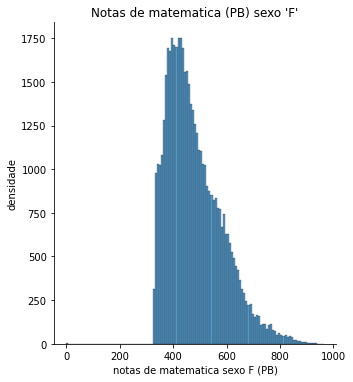

In [87]:
ax = sns.displot(mulher_math_pb.NU_NOTA_MT).set(title="Notas de matematica (PB) sexo 'F'")
ax.set(xlabel="notas de matematica sexo F (PB)", ylabel="densidade")

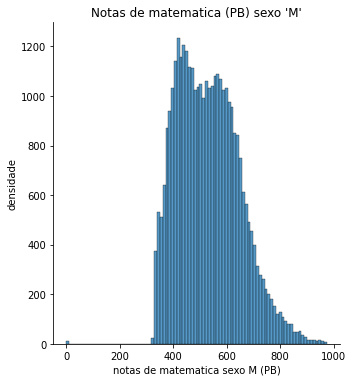

In [88]:
ax = sns.displot(homem_math_pb.NU_NOTA_MT).set(title="Notas de matematica (PB) sexo 'M'")
ax.set(xlabel="notas de matematica sexo M (PB)", ylabel="densidade")

Text(0.5, 1.0, 'Distribuicao das notas na PB por sexo')

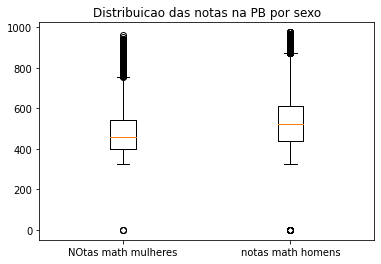

In [89]:
plt.boxplot([mulher_math_pb.NU_NOTA_MT, homem_math_pb.NU_NOTA_MT], labels=["NOtas math mulheres", "notas math homens"])
plt.title("Distribuicao das notas na PB por sexo")

Testando se veio de uma distribuicao normal

In [90]:
testing_normal_distribution(mulher_math_pb, 'NU_NOTA_MT')

p = 0
The null hypothesis can be rejected


In [91]:
testing_normal_distribution(homem_math_pb, 'NU_NOTA_MT')

p = 1.40324e-270
The null hypothesis can be rejected


Como o p_value eh menor que 0.05 The null hypothesis can be rejected. Deve-se usar um teste nao parametrico, como, por exemplo, o runksums que 'e o teste Wilcoxon baseado em ranqueamento.

In [92]:
test, p = ranksums(mulher_math_pb['NU_NOTA_MT'], homem_math_pb['NU_NOTA_MT'])
print(p)
print(test)

0.0
-65.51699380477623


Como o p_value 'e menor que 0.05, os valores de uma amostra (notas de matematica do sexo M) tem uma tendencia de serem maiores que os da outra amostra ((notas de matematica do sexo M)). Ou seja, as notas de matematica do sexo M em geral sao maiores que notas de matematica do sexo F.

Uma distribuicao tem valores maiores que a outra distribuicao

### Making the analises for all Brazilian states

Creating a list of all Brazilian states

In [93]:
states = list(data['SG_UF_RESIDENCIA'].unique())

In [94]:
states

['RS',
 'PB',
 'BA',
 'AL',
 'PA',
 'TO',
 'SP',
 'CE',
 'AM',
 'SE',
 'MG',
 'MA',
 'PI',
 'PE',
 'MT',
 'RJ',
 'GO',
 'RN',
 'ES',
 'AP',
 'DF',
 'SC',
 'PR',
 'RR',
 'RO',
 'MS',
 'AC']

Testing normal distribution for math grades (male and female) for all Brazilian states to decide which statistical test would be suitable

In [95]:
# for state in states:
#     print(state)
#     mulher_state = mulher_2020[mulher_2020['SG_UF_RESIDENCIA'] == state]
#     homem_state = homem_2020[homem_2020['SG_UF_RESIDENCIA'] == state]
#     print('Testing normal distribution for F')
#     testing_normal_distribution(mulher_state, 'NU_NOTA_MT')
#     print('Testing normal distribution for M')
#     testing_normal_distribution(homem_state, 'NU_NOTA_MT')

In [96]:
def ploting_distribution_female_male_per_state(state, course):
    dataset_women = mulher_2020[mulher_2020['SG_UF_RESIDENCIA'] == state]
    dataset_man = homem_2020[homem_2020['SG_UF_RESIDENCIA'] == state]
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    ax1 = sns.histplot(dataset_women[course], ax=ax1).set(title="Math grades distribution 'W'", xlabel='Math grades W', ylabel='density')
    ax2 = sns.histplot(dataset_man[course], ax=ax2).set(title="Math grades distribution 'M'",  xlabel='Math grades M', ylabel='density')
    plt.show()

In [97]:
def results_ranksum_per_state(state, course):
    dataset_women = mulher_2020[mulher_2020['SG_UF_RESIDENCIA'] == state]
    dataset_man = homem_2020[homem_2020['SG_UF_RESIDENCIA'] == state]
    test, p = ranksums(dataset_women[course], dataset_man[course])
    print(f'p:', p, f'test:', test)

In [98]:
def plot_distribution_ranksum_per_state(state, course):
    print(state)
    ploting_distribution_female_male_per_state(state, course)
    results_ranksum_per_state(state, course)

PB


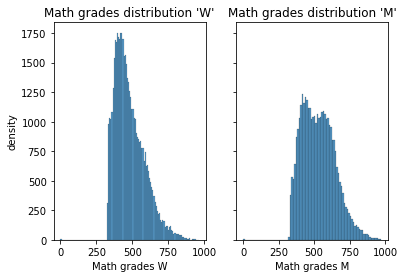

p: 0.0 test: -65.51699380477623


In [99]:
plot_distribution_ranksum_per_state('PB', 'NU_NOTA_MT')

Ploting distribution for all Brazilian states plus the ranksum test

In [100]:
# def plot_distribution_ranksum_all_states(state, course):
#     for state in states:
#         print(state)
#         ploting_distribution_female_male_per_state(state, course)
#         results_ranksum_per_state(state, course)

In [101]:
# plot_distribution_ranksum_all_states(list(data['SG_UF_RESIDENCIA'].unique()), 'NU_NOTA_MT')

RS
p: 0.0 test: -73.20768543730672


PB
p: 0.0 test: -65.51699380477623
